In [111]:
import numpy as np
import matplotlib.pyplot as plt

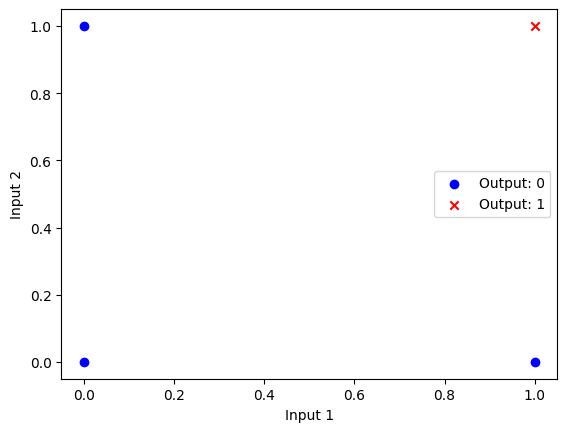

In [112]:
# AND gate
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

# OR gate
# x = np.array([[0,0],[0,1],[1,0],[1,1]])
# y = np.array([0,1,1,1])

# XOR gate
# x = np.array([[0,0],[0,1],[1,0],[1,1]])
# y = np.array([0,1,1,0])

def plot_data():
    y_false = y.flatten() == 0
    y_true = y.flatten() == 1
    plt.scatter(x[y_false,0],x[y_false,1],color="blue", marker="o", label="Output: 0")
    plt.scatter(x[y_true,0],x[y_true,1],color="red", marker="x", label="Output: 1")
    plt.legend()
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")

plot_data()

w = [-1.   1.   0.5]


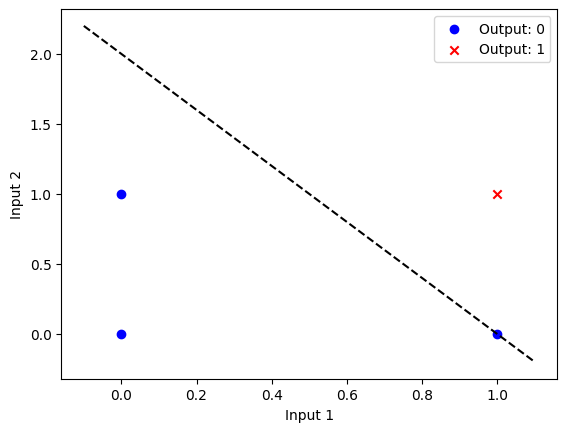

In [115]:
# training a perceptron
X = np.hstack((np.ones((x.shape[0],1)),x)) # add bias term
w = np.zeros(X.shape[1])
eta = 0.5

num_errors = X.shape[0]
max_iters = 100
iters = 0
while num_errors > 0 and iters < max_iters:
    num_errors = 0
    iters += 1
    for i in range(X.shape[0]):
        y_hat = ((X @ w) > 0).astype(int) # step function after weighting
        w = eta * (y[i] - y_hat[i]) * X[i] + w
        num_errors += abs(y[i] - y_hat[i])

print("w =", w)

# illustrate decision boundary
plot_data()

# We get a 1 if w0 + w1x1 + w2x2 > 0, and a 0 otherwise.
# solving for x2, we get x2 > -(w0 + w1x1) / w2

slope = -w[1] / w[2]
intercept = -w[0] / w[2]
decision_x = np.array([-0.1, 1.1])
plt.plot(decision_x, decision_x * slope + intercept,color="black", linestyle="--", label="Decision Boundary")

In [124]:
# MLP to solve XOR
x = np.array([[0,0],[0,1],[1,0],[1,1]])
X = np.hstack((np.ones((x.shape[0],1)),x))

w1 = np.array([[0, 1, 1], [-1, 1, 1]]).T

H = (X @ w1 > 0).astype(int)
H = np.hstack((np.ones((H.shape[0],1)),H))

w2 = np.array([0, 1, -1])
y = (H @ w2 > 0).astype(int)
print(y) # Yay!

[0 1 1 0]


Final prediction: 1.2039451475201937


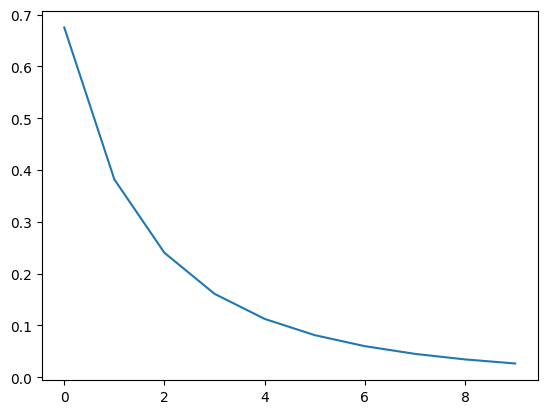

In [162]:
# toy mlp example
# forward pass
x = np.array([2, 3])
y = 1
w1 = np.array([[-0.78, 0.13], [0.85, 0.23]])
w2 = np.array([1.8, 0.40])

iterations = 20
eta = 0.01
loss = np.zeros(iterations)

for i in range(iterations):
    # forward pass
    y_hat = x @ w1 @ w2
    
    # update loss
    loss[i] = 0.5 * (y_hat - y)**2

    # backpropagate!
    w2_partials = (y_hat - y) * (x @ w1)
    w1_partials = np.outer(w2_partials, x)

    w1 = w1 - eta * w1_partials
    w2 = w2 - eta * w2_partials

plt.plot(loss)

# check how well we did
print("Final prediction:", x @ w1 @ w2)